In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv('/content/diabetes.csv')


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
489,8,194,80,0,0,26.1,0.551,67,0
653,2,120,54,0,0,26.8,0.455,27,0
131,9,122,56,0,0,33.3,1.114,33,1
296,2,146,70,38,360,28.0,0.337,29,1
151,4,114,65,0,0,21.9,0.432,37,0


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
columns_with_zeros = df.columns[df.isin([0]).any()].tolist()
print(columns_with_zeros)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']


In [12]:
columns_with_zeros= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Step 1: Count the number of zeros in each column
zeros_count = df[columns_with_zeros].eq(0).sum()

# Display the count of zeros in each column
print("Number of zeros in each column:\n", zeros_count)

Number of zeros in each column:
 Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [18]:
from sklearn.impute import SimpleImputer

# Replace zeros with the mean for specific columns
for column in columns_with_zeros:
    mean_value = df[df[column] != 0][column].mean()
    df[column] = df[column].replace(0, mean_value)

# Save the updated DataFrame to a new CSV file
df.to_csv('diabetes_data_imputed.csv', index=False)

In [19]:
df= pd.read_csv('/content/diabetes_data_imputed.csv')

In [20]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
578,10,133.0,68.0,29.15342,155.548223,27.0,0.245,36,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
355,9,165.0,88.0,29.15342,155.548223,30.4,0.302,49,1
645,2,157.0,74.0,35.00000,440.000000,39.4,0.134,30,0
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
18,1,103.0,30.0,38.00000,83.000000,43.3,0.183,33,0
726,1,116.0,78.0,29.00000,180.000000,36.1,0.496,25,0
265,5,96.0,74.0,18.00000,67.000000,33.6,0.997,43,0
623,0,94.0,70.0,27.00000,115.000000,43.5,0.347,21,0
683,4,125.0,80.0,29.15342,155.548223,32.3,0.536,27,1


In [21]:
columns_with_zeros = df.columns[df.isin([0]).any()].tolist()
print(columns_with_zeros)

['Pregnancies', 'Outcome']


Exploratory Data Analysis

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
print(df['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


<Axes: >

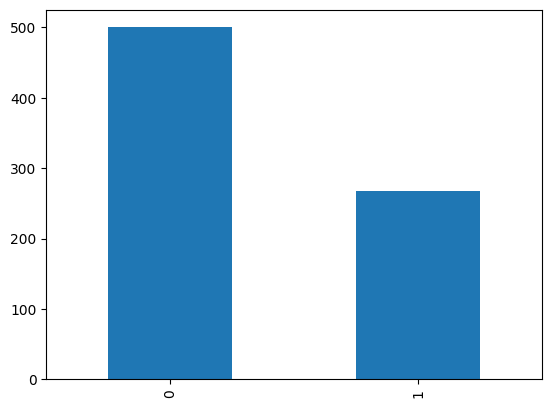

In [22]:
df['Outcome'].value_counts().plot(kind='bar')

In [23]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


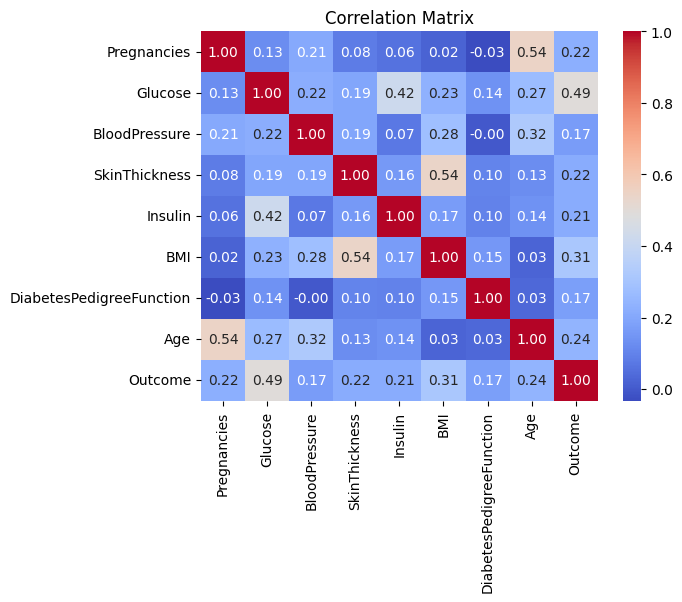

In [25]:
# 4. Correlation Analysis
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

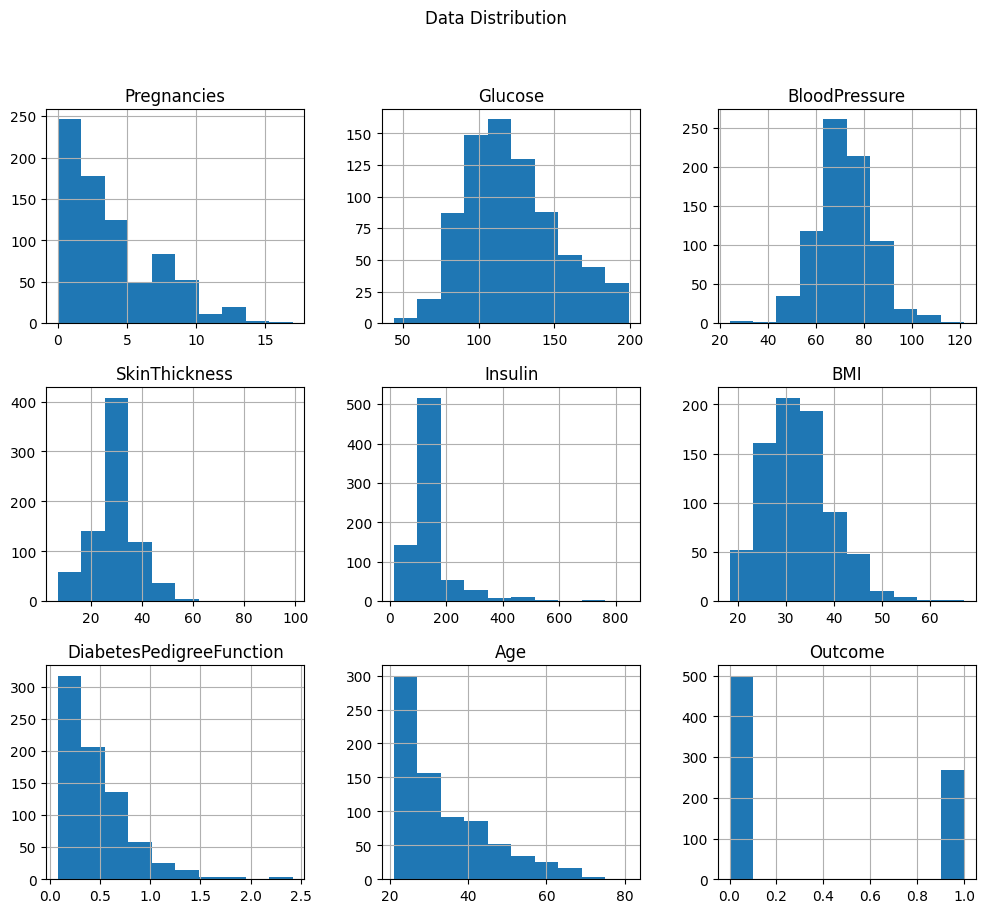

In [26]:
# 2. Data Distribution
df.hist(figsize=(12, 10))
plt.suptitle("Data Distribution")
plt.show()

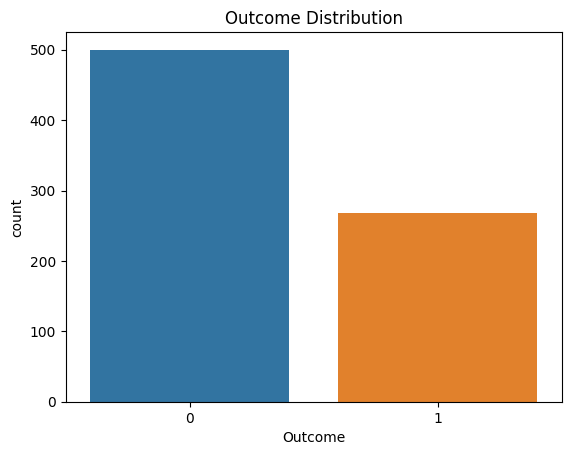

In [27]:
# 3. Target Variable Distribution
sns.countplot(x='Outcome', data=df)
plt.title("Outcome Distribution")
plt.show()

In [28]:
# 5. Pair Plots
sns.pairplot(df, hue='Outcome')
plt.suptitle("Pair Plots")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

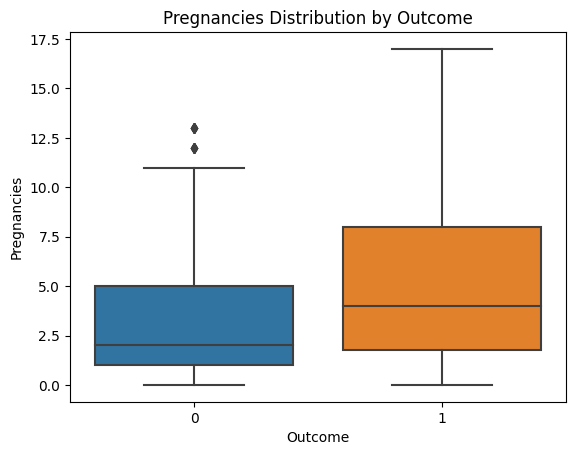

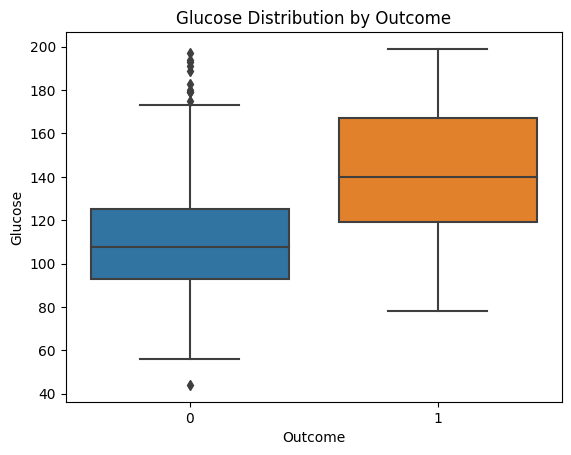

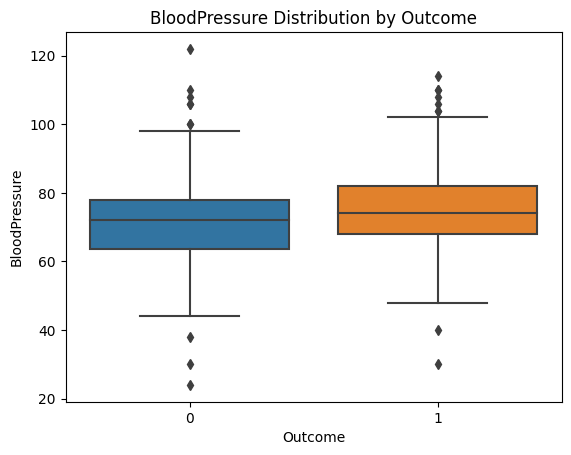

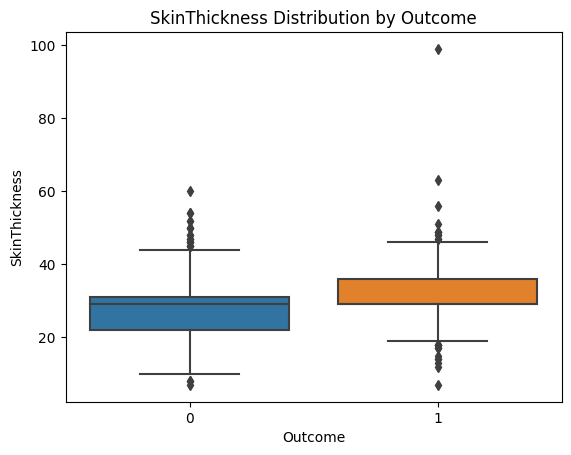

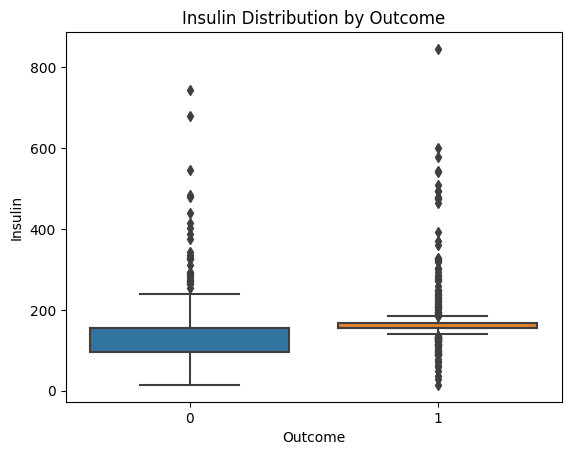

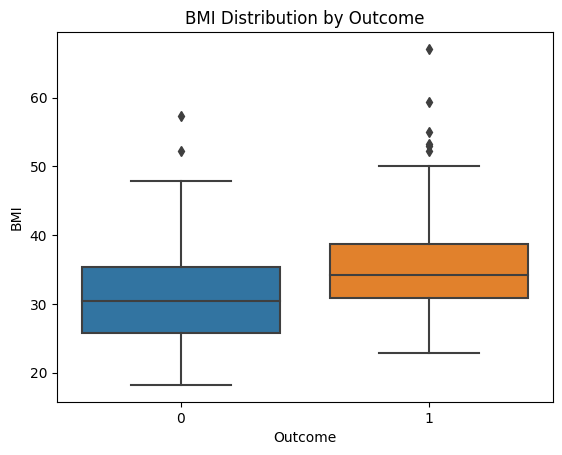

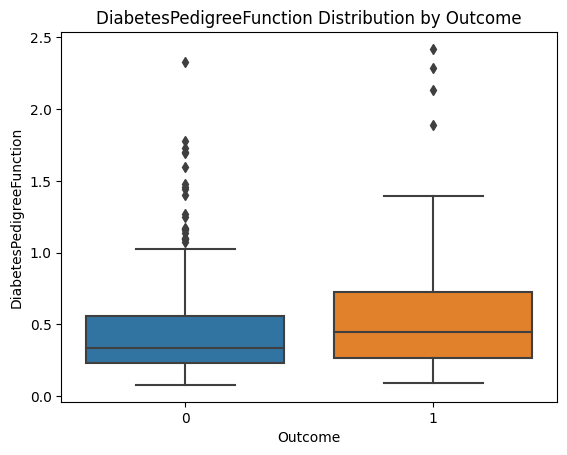

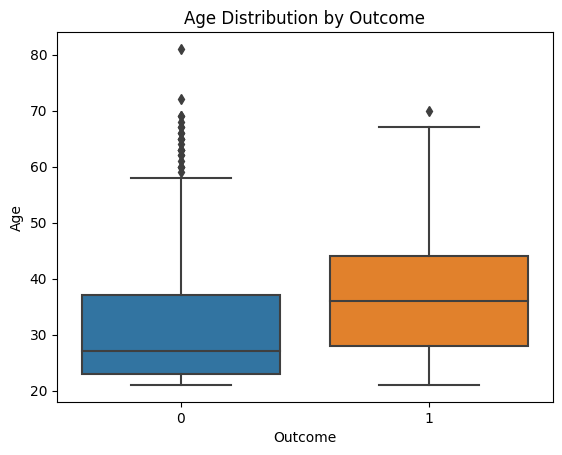

In [29]:
# 6. Box Plots
for column in df.columns:
    if column != 'Outcome':
        sns.boxplot(x='Outcome', y=column, data=df)
        plt.title(f"{column} Distribution by Outcome")
        plt.show()

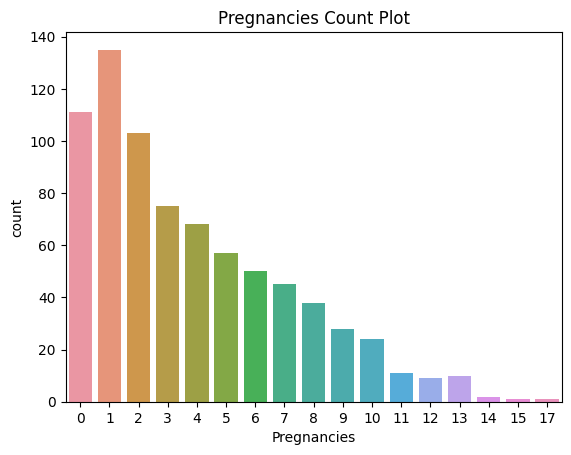

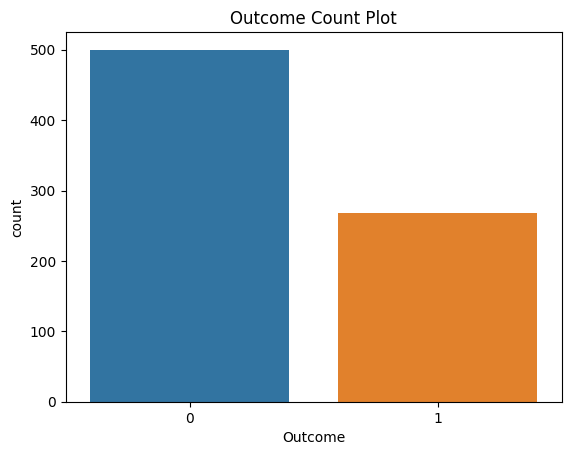

In [30]:
categorical_columns = ['Pregnancies', 'Outcome']  # Add other categorical columns if present
for column in categorical_columns:
    sns.countplot(x=column, data=df)
    plt.title(f"{column} Count Plot")
    plt.show()

Train Test Spliting

In [31]:
# Assuming your target variable is 'Outcome'
# Replace 'Outcome' with the actual name of your target variable if it's different
target_variable = 'Outcome'

# Extract features (X) using iloc
X = df.iloc[:, :-1]  # Select all columns except the last one (Outcome)

# Extract target variable (y) using iloc
y = df.iloc[:, -1]  # Select the last column (Outcome)

In [32]:
# Display the first few rows of X and y
print("X (features):")
print(X.head())

print("\ny (target variable):")
print(y.head())


X (features):
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

y (target variable):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [33]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled data
print("X_train_scaled:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

print("\nX_test_scaled:")
print(pd.DataFrame(X_test_scaled, columns=X.columns).head())


X_train_scaled:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.526397 -1.258282       0.013210       0.047309  0.007395  0.015013   
1     1.588046 -0.327354       0.806867      -0.565694  0.007395 -0.599350   
2    -0.828460  0.570327      -2.170954      -1.160447 -0.827391 -0.527199   
3    -1.130523  1.301771      -1.840085       0.047309  0.007395 -1.508458   
4     0.681856  0.404090       0.641433       0.980665  2.475016  1.998099   

   DiabetesPedigreeFunction       Age  
0                 -0.490735 -1.035940  
1                  2.415030  1.487101  
2                  0.549161 -0.948939  
3                 -0.639291  2.792122  
4                 -0.686829  1.139095  

X_test_scaled:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.681856 -0.792818      -1.178347       0.504862  0.403820  0.237605   
1    -0.526397 -0.327354       0.227846       0.385911  0.007395  0.482920   
2    -0.526397 -0.460344 

KNN Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Instantiate the KNN classifier
#knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as needed
knn_classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')
# Step 3: Fit the classifier to the training data
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [43]:
# Step 4: Make predictions on the testing data
y_pred = knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7597402597402597


In [44]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



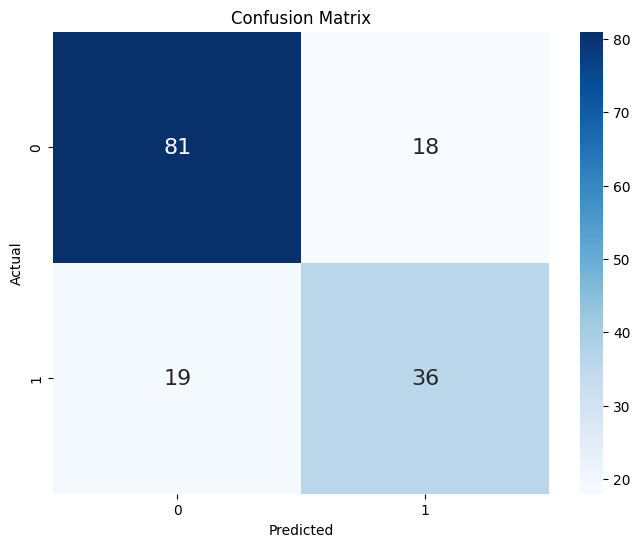

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Instantiate the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform Grid Search
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator for predictions
best_knn_model = grid_search.best_estimator_
y_pred_tuned = best_knn_model.predict(X_test_scaled)


Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [47]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

# Display the results for the tuned model
print("Tuned Model Accuracy:", accuracy_tuned)
print("\nConfusion Matrix (Tuned Model):")
print(conf_matrix_tuned)
print("\nClassification Report (Tuned Model):")
print(class_report_tuned)


Tuned Model Accuracy: 0.7272727272727273

Confusion Matrix (Tuned Model):
[[76 23]
 [19 36]]

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [50]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Instantiate the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform Randomized Search
random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Parameters:", random_search.best_params_)

# Use the best estimator for predictions
best_knn_model = random_search.best_estimator_
y_pred_tuned = best_knn_model.predict(X_test_scaled)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

# Display the results for the tuned model
print("Tuned Model Accuracy:", accuracy_tuned)
print("\nConfusion Matrix (Tuned Model):")
print(conf_matrix_tuned)
print("\nClassification Report (Tuned Model):")
print(class_report_tuned)

Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 9}
Tuned Model Accuracy: 0.7207792207792207

Confusion Matrix (Tuned Model):
[[76 23]
 [20 35]]

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [52]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Train a KNN classifier on the resampled data
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as needed
knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluate the performance of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Display the results for the KNN model with oversampling
print("KNN Model Accuracy with Oversampling:", accuracy_knn)
print("\nConfusion Matrix (KNN Model with Oversampling):")
print(conf_matrix_knn)
print("\nClassification Report (KNN Model with Oversampling):")
print(class_report_knn)


KNN Model Accuracy with Oversampling: 0.6753246753246753

Confusion Matrix (KNN Model with Oversampling):
[[64 35]
 [15 40]]

Classification Report (KNN Model with Oversampling):
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        99
           1       0.53      0.73      0.62        55

    accuracy                           0.68       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.71      0.68      0.68       154



In [53]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

# Train a KNN classifier on the undersampled data
knn_classifier_undersampled = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as needed
knn_classifier_undersampled.fit(X_undersampled, y_undersampled)

# Make predictions on the testing data
y_pred_knn_undersampled = knn_classifier_undersampled.predict(X_test_scaled)

# Evaluate the performance of the KNN model with undersampling
accuracy_knn_undersampled = accuracy_score(y_test, y_pred_knn_undersampled)
conf_matrix_knn_undersampled = confusion_matrix(y_test, y_pred_knn_undersampled)
class_report_knn_undersampled = classification_report(y_test, y_pred_knn_undersampled)

# Display the results for the KNN model with undersampling
print("KNN Model Accuracy with Undersampling:", accuracy_knn_undersampled)
print("\nConfusion Matrix (KNN Model with Undersampling):")
print(conf_matrix_knn_undersampled)
print("\nClassification Report (KNN Model with Undersampling):")
print(class_report_knn_undersampled)


KNN Model Accuracy with Undersampling: 0.6818181818181818

Confusion Matrix (KNN Model with Undersampling):
[[59 40]
 [ 9 46]]

Classification Report (KNN Model with Undersampling):
              precision    recall  f1-score   support

           0       0.87      0.60      0.71        99
           1       0.53      0.84      0.65        55

    accuracy                           0.68       154
   macro avg       0.70      0.72      0.68       154
weighted avg       0.75      0.68      0.69       154



In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the performance of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display the results for the Random Forest model without upsampling or downsampling
print("Random Forest Model Accuracy (No Resampling):", accuracy_rf)
print("\nConfusion Matrix (Random Forest Model without Resampling):")
print(conf_matrix_rf)
print("\nClassification Report (Random Forest Model without Resampling):")
print(class_report_rf)


Random Forest Model Accuracy (No Resampling): 0.7532467532467533

Confusion Matrix (Random Forest Model without Resampling):
[[80 19]
 [19 36]]

Classification Report (Random Forest Model without Resampling):
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [55]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

# Instantiate a Random Forest classifier
rf_classifier_undersampled = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the undersampled data
rf_classifier_undersampled.fit(X_undersampled, y_undersampled)

# Make predictions on the scaled testing data
y_pred_rf_undersampled = rf_classifier_undersampled.predict(X_test_scaled)

# Evaluate the performance of the Random Forest model with undersampling
accuracy_rf_undersampled = accuracy_score(y_test, y_pred_rf_undersampled)
conf_matrix_rf_undersampled = confusion_matrix(y_test, y_pred_rf_undersampled)
class_report_rf_undersampled = classification_report(y_test, y_pred_rf_undersampled)

# Display the results for the Random Forest model with undersampling
print("Random Forest Model Accuracy with Undersampling:", accuracy_rf_undersampled)
print("\nConfusion Matrix (Random Forest Model with Undersampling):")
print(conf_matrix_rf_undersampled)
print("\nClassification Report (Random Forest Model with Undersampling):")
print(class_report_rf_undersampled)


Random Forest Model Accuracy with Undersampling: 0.7272727272727273

Confusion Matrix (Random Forest Model with Undersampling):
[[65 34]
 [ 8 47]]

Classification Report (Random Forest Model with Undersampling):
              precision    recall  f1-score   support

           0       0.89      0.66      0.76        99
           1       0.58      0.85      0.69        55

    accuracy                           0.73       154
   macro avg       0.74      0.76      0.72       154
weighted avg       0.78      0.73      0.73       154

